<a href="https://colab.research.google.com/github/hunie-son/hunie-son.github.io/blob/main/Coms573_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix

In [2]:
BATCH_SIZE = 128

def create_model(x=None):
    # we initialize the model
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), input_shape=(48,48,3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3),   padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
   
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 4
    model.add(Conv2D(512, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
   
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 5
    model.add(Conv2D(512, (3, 3),  padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
   
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3)))


    # FC layers
    model.add(Flatten())
    #model.add(Dropout(0.3))
    model.add(Dropout(0.5))
    
    model.add(Dense(7, activation='softmax'))

    return model

model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0

In [3]:
def image_data_generator(data_dir,
                         data_augment=False,
                         batch_size=BATCH_SIZE,
                         target_size=(48, 48),
                         color_mode='rgb',
                         class_mode='categorical',
                         shuffle=True):
    if data_augment:
        datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
    else:
        datagen = ImageDataGenerator(rescale=1./255)

    generator = datagen.flow_from_directory(data_dir,
                                            target_size=target_size,
                                            color_mode=color_mode,
                                            batch_size=batch_size,
                                            shuffle=shuffle,
                                            class_mode=class_mode)
    return generator

In [4]:
from google.colab import drive
drive.flush_and_unmount() 
#drive.mount('/content/drive')


Drive not mounted, so nothing to flush and unmount.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cp -av '/content/drive/MyDrive/Dataset.zip' '/tmp'

'/content/drive/MyDrive/Dataset.zip' -> '/tmp/Dataset.zip'


In [7]:
import os
import zipfile

local_zip = '/tmp/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Dataset')

In [8]:
train_generator = image_data_generator('/tmp/Dataset/Dataset/train',data_augment=True)
validation_generator = image_data_generator('/tmp/Dataset/Dataset/valid')

Found 92968 images belonging to 7 classes.
Found 17356 images belonging to 7 classes.


In [9]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
import tensorflow.keras
callbacks_list = [
tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, 
                                         patience=10, verbose=1, mode='auto',baseline=None, 
                                         restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=5,
                                             verbose=1,mode='auto')
]

In [ ]:
history = model.fit(train_generator,steps_per_epoch=92968//BATCH_SIZE,epochs=100,
                              validation_data=validation_generator,
                              validation_steps=17356//BATCH_SIZE,callbacks=callbacks_list )

Epoch 1/100
726/726 [==============================] - 196s 253ms/step - loss: 1.7827 - accuracy: 0.3403 - val_loss: 1.6127 - val_accuracy: 0.3390 - lr: 0.0010
Epoch 2/100
726/726 [==============================] - 181s 250ms/step - loss: 1.4769 - accuracy: 0.4601 - val_loss: 1.5274 - val_accuracy: 0.4378 - lr: 0.0010
Epoch 3/100
726/726 [==============================] - 182s 250ms/step - loss: 1.2008 - accuracy: 0.5800 - val_loss: 1.4572 - val_accuracy: 0.4845 - lr: 0.0010
Epoch 4/100
726/726 [==============================] - 181s 250ms/step - loss: 1.0989 - accuracy: 0.6185 - val_loss: 1.4679 - val_accuracy: 0.4185 - lr: 0.0010
Epoch 5/100
726/726 [==============================] - 181s 249ms/step - loss: 1.0467 - accuracy: 0.6362 - val_loss: 1.2574 - val_accuracy: 0.5431 - lr: 0.0010
Epoch 6/100
726/726 [==============================] - 180s 247ms/step - loss: 1.0078 - accuracy: 0.6479 - val_loss: 1.3346 - val_accuracy: 0.5328 - lr: 0.0010
Epoch 7/100
726/726 [===================

In [12]:
def evaluate_model(model=None, filepath=None):
    """return the evaluate """
    if not model:
        assert(filepath)
        model = models.load_model(filepath)
    test_generator = image_data_generator('/tmp/Dataset/Dataset/test', batch_size=1, shuffle=False)

    nb_samples = len(test_generator)
    score = model.evaluate(test_generator, steps=nb_samples)

    class_labels = validation_generator.class_indices
    class_labels = {v: k for k, v in class_labels.items()}
    classes = list(class_labels.values())
    print(class_labels)
    print(classes)
    print(score)
    return score

In [13]:
score = evaluate_model(model)

Found 17356 images belonging to 7 classes.
17356/17356 [==============================] - 179s 10ms/step - loss: 0.9928 - accuracy: 0.6482
{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
[0.9928383827209473, 0.6481908559799194]


In [14]:
from keras.models import load_model

model.save('Test.h5')
model.save('/content/sample_data/my_modeltest')

INFO:tensorflow:Assets written to: /content/sample_data/my_modeltest/assets


In [15]:
from keras.models import load_model

model = load_model('/content/Test.h5')

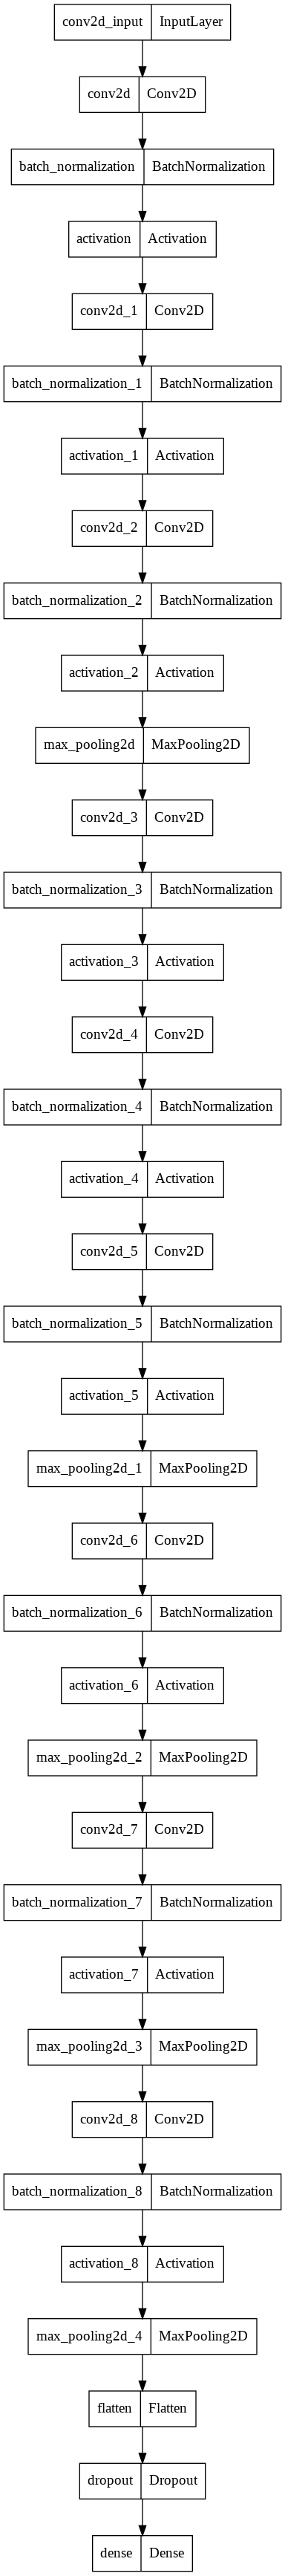

In [17]:
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.models import load_model
#from keras_self_attention import SeqSelfAttention

#model = load_model('/data/Auditory_Emotion_Recognition/model_attention/4emotions_auditory_cnn_model_self_GAP_pati50_epoch200_dropout0.2,relu_lr1e-05_8conv5dim+1GRU2FC_Zscore_lrdecay5.4e-08_acc:0.5498_test:_57.42.h5',custom_objects={'SeqSelfAttention':SeqSelfAttention})
plot_model(model, to_file='./model.png')

In [18]:
from matplotlib import pyplot as plt

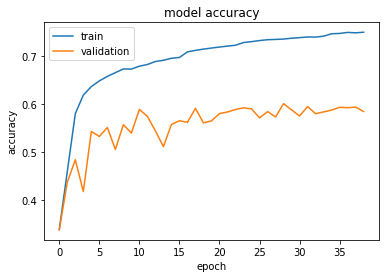

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

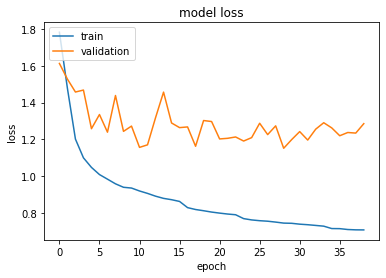

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [21]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=c6f913c531b37be2d82984ffcb65ba6fdaf466d63db8c1c0bd07a1abefa7b79a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [22]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

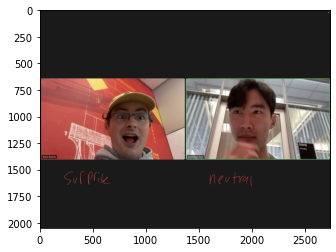

In [23]:
image1 = Image.open("IMG_0414.PNG")
image_array1 = np.array(image1)
plt.imshow(image_array1)

In [24]:
image = face_recognition.load_image_file("IMG_0414.PNG")

face_locations = face_recognition.face_locations(image)

In [25]:
face_locations

[(889, 1060, 1274, 675), (889, 2130, 1274, 1745)]

In [26]:
print (len(face_locations))

2


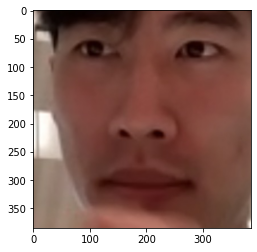

In [40]:
top, right, bottom, left = face_locations[1]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")

In [41]:
print (face_image1.shape)

(385, 385, 3)


In [49]:
face_image=face_image1

In [50]:
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 3])
print (face_image.shape)

(1, 48, 48, 3)


In [52]:
#model = load_model("my_modelD3.h5")
predicted_class1 = model.predict(face_image)
print(predicted_class1)

[[0. 0. 0. 1. 0. 0. 0.]]


In [53]:
model = load_model("/content/Test.h5")



predicted_class = model.predict(face_image)
print(predicted_class)

[[0. 0. 0. 1. 0. 0. 0.]]


In [35]:
'''
model = load_model("my_modelD3.h5")
model1 = load_model("my_model.h5")
model2 = load_model("my_model2.h5")
model3 = load_model("my_modelb32.h5")
model4 = load_model("my_modelb64.h5")
model5 = load_model("my_modelb64e100.h5")
'''

predicted_class = model.predict(face_image)
print(predicted_class)
'''
predicted_class1 = model1.predict(face_image)
print(predicted_class1)
print('--------------')
predicted_class2 = model2.predict(face_image)
print(predicted_class2)
print('--------------')
predicted_class3 = model3.predict(face_image)
print(predicted_class3)
predicted_class4 = model4.predict(face_image)
print(predicted_class4)
predicted_class5 = model5.predict(face_image)
print(predicted_class5)
'''

[[0. 0. 0. 1. 0. 0. 0.]]


"\npredicted_class1 = model1.predict(face_image)\nprint(predicted_class1)\nprint('--------------')\npredicted_class2 = model2.predict(face_image)\nprint(predicted_class2)\nprint('--------------')\npredicted_class3 = model3.predict(face_image)\nprint(predicted_class3)\npredicted_class4 = model4.predict(face_image)\nprint(predicted_class4)\npredicted_class5 = model5.predict(face_image)\nprint(predicted_class5)\n"

In [54]:
result = np.max(predicted_class)
print (result)


1.0


In [ ]:
result = np.max(predicted_class)
print (result)
result1 = np.max(predicted_class1)
print (result1)
result2 = np.max(predicted_class2)
print (result2)
result3 = np.max(predicted_class3)
print (result3)
result4 = np.max(predicted_class4)
print (result4)
result5 = np.max(predicted_class5)
print (result5)


In [37]:
r = np.argmax(predicted_class)
print (r)


3


In [ ]:
r = np.argmax(predicted_class)
print (r)
r1 = np.argmax(predicted_class1)
print (r1)
r2 = np.argmax(predicted_class2)
print (r2)
r3 = np.argmax(predicted_class3)
print (r3)
r4 = np.argmax(predicted_class4)
print (r4)
r5 = np.argmax(predicted_class5)
print (r5)


In [38]:
emotion_dict= {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
label_map = dict((v,k) for k,v in emotion_dict.items())
predicted_label = label_map[r]
print(predicted_label)

happy


In [39]:
emotion_dict= {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
label_map = dict((v,k) for k,v in emotion_dict.items())
predicted_label = label_map[r1]
print(predicted_label)

NameError: ignored